# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [28]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

# Display the data table for preview


In [35]:
merged_pd = pd.merge(study_results,mouse_metadata,how = 'outer', on = 'Mouse ID')

merged_pd.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [36]:
count_of_mouse = merged_pd['Mouse ID'].value_counts()
number_of_mouse = len(merged_pd['Mouse ID'].unique())
number_of_mouse

249

In [37]:

duplicateRows = merged_pd.loc[merged_pd.duplicated(subset =['Mouse ID', 'Timepoint',]), 'Mouse ID'].unique()

duplicateRows

array(['g989'], dtype=object)

In [39]:
duplicated_mouse_df = merged_pd.loc[merged_pd["Mouse ID"]=="g989"]

duplicated_mouse_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26


In [40]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

dropped_duplicate = merged_pd[merged_pd['Mouse ID'].isin(duplicateRows)==False]
dropped_duplicate.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [32]:
# count_of_mouse = merged_pd['Mouse ID'].value_counts()
# number_of_mouse = len(merged_pd['Mouse ID'].unique())
# number_of_mouse

new_mouse_count = len(dropped_duplicate['Mouse ID'].unique())
new_mouse_count

248

## Summary Statistics

In [53]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean = merged_pd.groupby("Drug Regimen").mean()['Tumor Volume (mm3)']
median = merged_pd.groupby("Drug Regimen").median()['Tumor Volume (mm3)']
variance = merged_pd.groupby("Drug Regimen").var()['Tumor Volume (mm3)']
standard_deviation = merged_pd.groupby("Drug Regimen").std()['Tumor Volume (mm3)']
sem = merged_pd.groupby("Drug Regimen").sem()['Tumor Volume (mm3)']

stats_df = pd.DataFrame(mean)
stats_df2 = stats_df.rename(columns={"Tumor Volume (mm3)": "Mean Tumor Volume"})

stats_df2["Median Tumor Volume"] = median
stats_df2["Standard deviation Tumor Volume"]= standard_deviation
stats_df2["Sem Tumor Volume"]= sem
stats_df2["Variance Tumor Volume"]= variance

stats_df2

,Mean Tumor Volume,Median Tumor Volume,Standard deviation Tumor Volume,Sem Tumor Volume,Variance Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346,24.947764
Ceftamin,52.591172,51.776157,6.268188,0.469821,39.290177
Infubinol,52.884795,51.820584,6.567243,0.492236,43.128684
Ketapril,55.235638,53.698743,8.279709,0.603860,68.553577
Naftisol,54.331565,52.509285,8.134708,0.596466,66.173479
Placebo,54.033581,52.288934,7.821003,0.581331,61.168083
Propriva,52.322552,50.854632,6.507770,0.512884,42.351070
Ramicane,40.216745,40.673236,4.846308,0.320955,23.486704
Stelasyn,54.233149,52.431737,7.710419,0.573111,59.450562


In [63]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.

stats_method2 = merged_pd.groupby('Drug Regimen')
agg_method = stats_method2.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
agg_method

/var/folders/61/z5t1vkmj1td0zx5kssy1ljsr0000gn/T/ipykernel_37582/916532508.py:7: FutureWarning: ['Mouse ID', 'Sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  agg_method = stats_method2.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

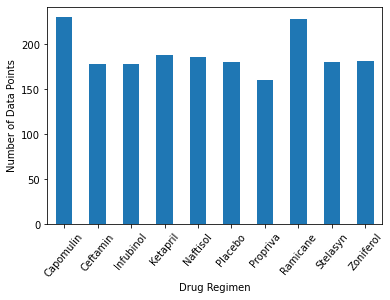

In [79]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
all_timpoints = merged_pd.groupby('Drug Regimen').count()['Tumor Volume (mm3)']
bar_graph = pd.DataFrame(all_timpoints)

also = bar_graph.plot.bar(legend=False,rot=50)
also
plt.ylabel("Number of Data Points")
plt.savefig('barplot1')

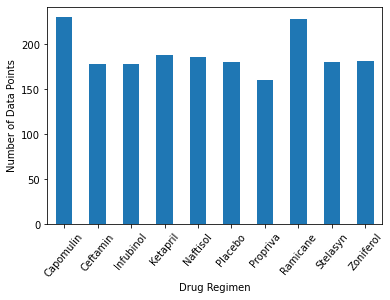

In [45]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
all_timpoints = merged_pd.groupby('Drug Regimen').count()['Tumor Volume (mm3)']
bar_graph = pd.DataFrame(all_timpoints)

also = bar_graph.plot.bar(legend=False,rot=50)
also
plt.ylabel("Number of Data Points")
plt.savefig('barplot1')

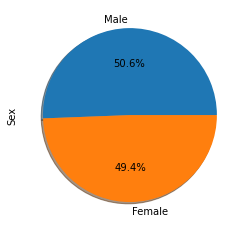

In [43]:
# plt.pie(sizes, explode=explode, labels=labels, colors=colors,
#         autopct="%1.1f%%", shadow=True, startangle=140)

Mouses_sex = merged_pd['Sex'].value_counts()
Mouses_sex

Mouses_sex.plot(kind= "pie", autopct="%1.1f%%", shadow = True)
plt.show()

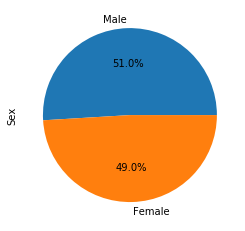

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [47]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Treatment_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]      
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Treatment_merge = merged_pd[merged_pd["Drug Regimen"].isin(Treatment_regimens)]
greatest_timepoint = Treatment_merge.groupby(["Drug Regimen", "Mouse ID"]).agg(tumor_vol=("Tumor Volume (mm3)", lambda x: x.iloc[-1]))

Treatment_merge

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [48]:
 #Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
treatments = 0

for drug in Treatment_regimens 
    quartiles = last_timepoint[drug].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)

# Locate the rows which contain mice on each drug and get the tumor volumes

    
# add subset 

    
# Determine outliers using upper and lower bounds

SyntaxError: invalid syntax (1548134206.py, line 11)

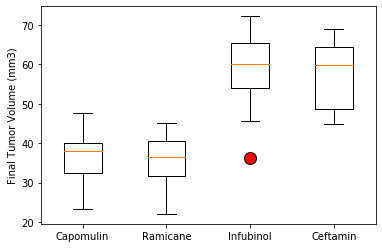

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.



## Line and Scatter Plots

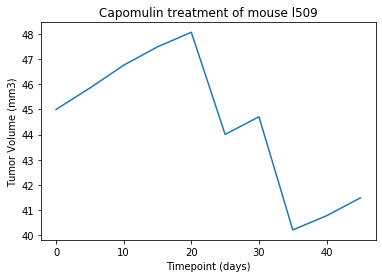

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin



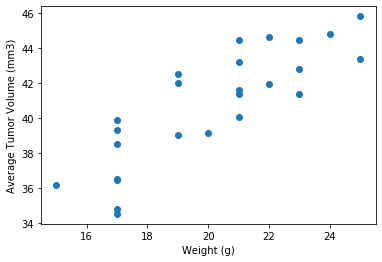

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen



## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


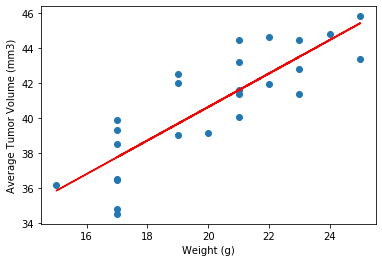

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

